# Yield

* per site in cortex
* First 10 minutes of recording

**method**: 

* We divide the unit yield by the number of channels because different experiments had a different number of sites in the cortex, while some sites were in the white matter or outside the brain.
* The unit yield is a first metrics to quantify the dark matter problem. It reveals the the extreme subsampling of the population within 50 microns of the probe
* We compared with the theoretical yield.
* we validated that no ground truth units were silents within the first 10 minutes
* We compare the yield per site because by choosing to reproduce Horvath depths, to enable comparison with in vivo, we do not cover the entire column, thus can not compare the total yield that would be produced with dense probe covering the entire column with the total yield obtained with neuropixels, which covers the entire column. 

activate npx...

In [1]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config, savefig
from src.nodes.analysis.failures import the_yield
from src.nodes import utils
from src.nodes.postpro import metadata as meta

# DATASETS

# NEUROPIXELS

# Marques-Smith (M)
cfg_m, _ = get_config("vivo_marques",  "c26").values()
KS4_m = cfg_m["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_m = cfg_m["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_m = cfg_m["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_m = cfg_m["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_m = cfg_m["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_m = cfg_m["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
REC_m = cfg_m["probe_wiring"]["full"]["output"]

# npx synth (S)
cfg_nb, _ = get_config("buccino_2020",  "2020").values()
KS4_nb = cfg_nb["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_nb = cfg_nb["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_nb = cfg_nb["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_nb = cfg_nb["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_nb = cfg_nb["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_nb = cfg_nb["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
REC_nb = cfg_nb["probe_wiring"]["full"]["output"]
GT_nb = cfg_nb["ground_truth"]["full"]["output"]
GT_nb_10m = cfg_nb["ground_truth"]["10m"]["output"]

# npx spont. biophy (NS)
cfg_ns, _ = get_config("silico_neuropixels",  "npx_spont").values()
KS4_ns = cfg_ns["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_ns = cfg_ns["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_ns = cfg_ns["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_ns = cfg_ns["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_ns = cfg_ns["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_ns = cfg_ns["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
REC_ns = cfg_ns["probe_wiring"]["full"]["output"]
GT_ns = cfg_ns["ground_truth"]["10m"]["output"]
GT_ns_10m = cfg_ns["ground_truth"]["10m"]["output"]
BLUECFG_ns = cfg_ns["dataeng"]["blueconfig"]

# npx evoked. biophy (NE)
cfg_ne, _ = get_config("silico_neuropixels",  "npx_evoked").values()
KS4_ne = cfg_ne["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_ne = cfg_ne["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_ne = cfg_ne["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_ne = cfg_ne["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_ne = cfg_ne["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_ne = cfg_ne["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
REC_ne = cfg_ne["probe_wiring"]["full"]["output"]
GT_ne = cfg_ne["ground_truth"]["10m"]["output"]
GT_ne_10m = cfg_ne["ground_truth"]["10m"]["output"]
BLUECFG_ne = cfg_ne["dataeng"]["blueconfig"]


# DENSE PROBE

# Horvath 
# Depth 1 (HV1)
cfg_hv1, _ = get_config("vivo_horvath",  "probe_1").values()
KS4_hv1 = cfg_hv1["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_hv1 = cfg_hv1["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_hv1 = cfg_hv1["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_hv1 = cfg_hv1["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_hv1 = cfg_hv1["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_hv1 = cfg_hv1["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
REC_hv1 = cfg_hv1["probe_wiring"]["full"]["output"]
# Depth 2 (HV2)
cfg_hv2, _ = get_config("vivo_horvath",  "probe_2").values()
KS4_hv2 = cfg_hv2["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_hv2 = cfg_hv2["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_hv2 = cfg_hv2["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_hv2 = cfg_hv2["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_hv2 = cfg_hv2["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_hv2 = cfg_hv2["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
REC_hv2 = cfg_hv2["probe_wiring"]["full"]["output"]
# Depth 3 (HV3)
cfg_hv3, _ = get_config("vivo_horvath",  "probe_3").values()
KS4_hv3 = cfg_hv3["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_hv3 = cfg_hv3["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_hv3 = cfg_hv3["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_hv3 = cfg_hv3["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_hv3 = cfg_hv3["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_hv3 = cfg_hv3["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
REC_hv3 = cfg_hv3["probe_wiring"]["full"]["output"]

# Biophy. spont. model
# Depth 1 (HV1)
cfg_hs1, _ = get_config("dense_spont",  "probe_1").values()
KS4_hs1 = cfg_hs1["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_hs1 = cfg_hs1["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_hs1 = cfg_hs1["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_hs1 = cfg_hs1["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_hs1 = cfg_hs1["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_hs1 = cfg_hs1["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
GT_hs1 = cfg_hs1["ground_truth"]["10m"]["output"]
GT_hs1_10m = cfg_hs1["ground_truth"]["10m"]["output"]
REC_hs1 = cfg_hs1["probe_wiring"]["full"]["output"]
BLUECFG_hs1 = cfg_hs1["dataeng"]["blueconfig"]
# Depth 2 (HV2)
cfg_hs2, _ = get_config("dense_spont",  "probe_2").values()
KS4_hs2 = cfg_hs2["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_hs2 = cfg_hs2["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_hs2 = cfg_hs2["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_hs2 = cfg_hs2["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_hs2 = cfg_hs2["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_hs2 = cfg_hs2["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
GT_hs2 = cfg_hs2["ground_truth"]["10m"]["output"]
GT_hs2_10m = cfg_hs2["ground_truth"]["10m"]["output"]
REC_hs2 = cfg_hs2["probe_wiring"]["full"]["output"]
BLUECFG_hs2 = cfg_hs2["dataeng"]["blueconfig"]
# Depth 2 (HV2)
cfg_hs3, _ = get_config("dense_spont",  "probe_3").values()
KS4_hs3 = cfg_hs3["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3_hs3 = cfg_hs3["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5_hs3 = cfg_hs3["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2_hs3 = cfg_hs3["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS_hs3 = cfg_hs3["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS_hs3 = cfg_hs3["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]
GT_hs3 = cfg_hs3["ground_truth"]["10m"]["output"]
GT_hs3_10m = cfg_hs3["ground_truth"]["10m"]["output"]
REC_hs3 = cfg_hs3["probe_wiring"]["full"]["output"]
BLUECFG_hs3 = cfg_hs3["dataeng"]["blueconfig"]

# FIGURE SETTINGS
# ticks
N_MJ_TCKS = 5
N_MN_TCKS = 11

# colors
cl = dict()
cl["COLOR_NV"] = [0.6, 0.6, 0.6]
cl["COLOR_NS"] = [0.9, 0.14, 0.15]
cl["COLOR_NB"] = [0.22, 0.5, 0.72] # blue
cl["COLOR_NE"] = [1, 0.49, 0] # orange
cl["COLOR_HV"] = "k" # black
cl["COLOR_HS"] = np.array([26, 152, 80]) / 255 # green

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5 # typically between 0.5 and 1
plt.rcParams["axes.linewidth"] = 0.5 #1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
legend_cfg = {"frameon": False, "handletextpad": 0.5}
tight_layout_cfg = {"pad": 0.001}
LG_FRAMEON = False              # no legend frame

2024-11-23 15:28:27,890 - root - utils.py - get_config - INFO - Reading experiment config.
2024-11-23 15:28:27,937 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-11-23 15:28:27,938 - root - utils.py - get_config - INFO - Reading experiment config.
2024-11-23 15:28:27,974 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-11-23 15:28:27,975 - root - utils.py - get_config - INFO - Reading experiment config.
2024-11-23 15:28:28,018 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-11-23 15:28:28,019 - root - utils.py - get_config - INFO - Reading experiment config.
2024-11-23 15:28:28,084 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-11-23 15:28:28,086 - root - utils.py - get_config - INFO - Reading experiment config.
2024-11-23 15:28:28,116 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-11-23 15:28:28,117 - root - utils.py - get_config 

### (1s) Get yields

* single-units

In [2]:
# parameters
sorters = ["ks4", "ks3", "ks2.5", "ks2", "ks", "hs"]

#### NPX


Marques-Smith

In [3]:
# setup
exps = ["M"] * len(sorters)
sort_paths = [KS4_m, KS3_m, KS2_5_m, KS2_m, KS_m, HS_m]

# get yields dataframe
df_m = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_m)
display(df_m)

# count sites in cortex
n_sites_m = the_yield.count_ctx_sites(REC_m)
n_sites_m

,layer,n_sites,yield per site,experiments,sorters
0,L2/3,42,0.023810,M,ks4
1,L4,34,0.029412,M,ks4
2,L5,42,0.476190,M,ks4
3,L6,98,0.755102,M,ks4
4,Out,158,0.474684,M,ks4
5,L1,10,0.000000,M,ks3
6,L2/3,42,0.047619,M,ks3
7,L4,34,0.029412,M,ks3
8,L5,42,0.642857,M,ks3
9,L6,98,0.826531,M,ks3


384

Synthetic simulation (Buccino)

In [4]:
# nb of sites in cortex
n_sites_nb = 384
# setup
exps = ["S"] * len(sorters)
sort_paths = [KS4_nb, KS3_nb, KS2_5_nb, KS2_nb, KS_nb, HS_nb]
# get yields dataframe
df_nb = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_nb)
df_nb

,layer,n_sites,yield per site,experiments,sorters
0,L5,384,0.981771,S,ks4
1,L5,384,0.908854,S,ks3
2,L5,384,1.075521,S,ks2.5
3,L5,384,3.937500,S,ks2
4,L5,384,3.265625,S,ks
5,L5,384,0.598958,S,hs


npx biophy. spont.

In [5]:
# setup
exps = ["NS"] * len(sorters)
sort_paths = [KS4_ns, KS3_ns, KS2_5_ns, KS2_ns, KS_ns, HS_ns]
# get yields dataframe
df_ns = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_ns)
display(df_ns)
# count sites in cortex
n_sites_ns = the_yield.count_ctx_sites(REC_ns)
n_sites_ns

,layer,n_sites,yield per site,experiments,sorters
0,L1,16,0.062500,NS,ks4
1,L2/3,47,0.042553,NS,ks4
2,L4,19,1.368421,NS,ks4
3,L5,52,2.230769,NS,ks4
4,L6,68,0.573529,NS,ks4
5,L1,16,0.000000,NS,ks3
6,L2/3,47,0.042553,NS,ks3
7,L4,19,1.315789,NS,ks3
8,L5,52,3.365385,NS,ks3
9,L6,68,0.455882,NS,ks3


202

npx biophy. evoked

In [6]:
# setup
exps = ["E"] * len(sorters)
sort_paths = [KS4_ne, KS3_ne, KS2_5_ne, KS2_ne, KS_ne, HS_ne]
# get yields dataframe
df_ne = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_ne)
display(df_ne)
# count sites in cortex
n_sites_ne = the_yield.count_ctx_sites(REC_ne)
n_sites_ne

,layer,n_sites,yield per site,experiments,sorters
0,L1,16,0.000000,E,ks4
1,L2/3,47,0.148936,E,ks4
2,L4,19,1.894737,E,ks4
3,L5,52,5.769231,E,ks4
4,L6,68,0.941176,E,ks4
5,Outside,182,0.005495,E,ks4
6,L1,16,0.062500,E,ks3
7,L2/3,47,0.148936,E,ks3
8,L4,19,2.421053,E,ks3
9,L5,52,7.269231,E,ks3


202

#### Dense probe

Dense biophy. spont. depth 1

In [7]:
# DEPTH 1

# setup
exps = ["HS1"] * len(sorters)
sort_paths = [KS4_hs1, KS3_hs1, KS2_5_hs1, KS2_hs1, KS_hs1, HS_hs1]
# get yields dataframe
df_hs1 = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_hs1)
display(df_hs1)
# count sites in cortex
n_sites_hs1 = the_yield.count_ctx_sites(REC_hs1)
print(n_sites_hs1)

# DEPTH 2

# setup
exps = ["HS2"] * len(sorters)
sort_paths = [KS4_hs2, KS3_hs2, KS2_5_hs2, KS2_hs2, KS_hs2, HS_hs2]
# get yields dataframe
df_hs2 = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_hs2)
display(df_hs2)
# count sites in cortex
n_sites_hs2 = the_yield.count_ctx_sites(REC_hs2)
print(n_sites_hs2)

# DEPTH 3

# setup
exps = ["HS3"] * len(sorters)
sort_paths = [KS4_hs3, KS3_hs3, KS2_5_hs3, KS2_hs3, KS_hs3, HS_hs3]
# get yields dataframe
df_hs3 = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_hs3)
display(df_hs3)
# count sites in cortex
n_sites_hs3 = the_yield.count_ctx_sites(REC_hs3)
print(n_sites_hs3)

,layer,n_sites,yield per site,experiments,sorters
0,L1,37,0.081081,HS1,ks4
1,L2/3,64,0.062500,HS1,ks4
2,Outside,27,0.000000,HS1,ks4
3,L1,37,0.270270,HS1,ks3
4,L2/3,64,0.156250,HS1,ks3
5,Outside,27,0.037037,HS1,ks3
6,L1,37,0.540541,HS1,ks2.5
7,L2/3,64,1.593750,HS1,ks2.5
8,Outside,27,2.259259,HS1,ks2.5
9,L1,37,1.000000,HS1,ks2


101


,layer,n_sites,yield per site,experiments,sorters
0,L2/3,8,1.125000,HS2,ks4
1,L4,32,0.343750,HS2,ks4
2,L5,88,0.636364,HS2,ks4
3,L2/3,8,0.875000,HS2,ks3
4,L4,32,0.562500,HS2,ks3
5,L5,88,0.613636,HS2,ks3
6,L2/3,8,1.000000,HS2,ks2.5
7,L4,32,1.281250,HS2,ks2.5
8,L5,88,1.477273,HS2,ks2.5
9,L2/3,8,4.625000,HS2,ks2


128


,layer,n_sites,yield per site,experiments,sorters
0,L6,76,1.618421,HS3,ks4
1,Outside,52,1.461538,HS3,ks4
2,L6,76,1.986842,HS3,ks3
3,Outside,52,1.807692,HS3,ks3
4,L6,76,2.092105,HS3,ks2.5
5,Outside,52,1.269231,HS3,ks2.5
6,L6,76,2.184211,HS3,ks2
7,Outside,52,1.269231,HS3,ks2
8,L6,76,6.631579,HS3,ks
9,Outside,52,5.903846,HS3,ks


76


In vivo Horvath

In [8]:
# DEPTH 1

# setup
exps = ["HV1"] * len(sorters)
sort_paths = [KS4_hv1, KS3_hv1, KS2_5_hv1, KS2_hv1, KS_hv1, HS_hv1]
# get yields dataframe
df_hv1 = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_hv1)
display(df_hv1)
# count sites in cortex
n_sites_hv1 = the_yield.count_ctx_sites(REC_hv1)
print(n_sites_hv1)

# DEPTH 2

# setup
exps = ["HV2"] * len(sorters)
sort_paths = [
    KS4_hv2,
    KS3_hv2,
    KS2_5_hv2,
    KS2_hv2,
    KS_hv2,
    HS_hv2,
]
# get yields dataframe
df_hv2 = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_hv2)
display(df_hv2)
# count sites in cortex
n_sites_hv2 = the_yield.count_ctx_sites(REC_hv2)
print(n_sites_hv2)

# DEPTH 3

# setup
exps = ["HV3"] * len(sorters)
sort_paths = [
    KS4_hv3,
    KS3_hv3,
    KS2_5_hv3,
    KS2_hv3,
    KS_hv3,
    HS_hv3,
]
# get yields dataframe
df_hv3 = the_yield.get_yield_per_site(sorters, exps, sort_paths, REC_hv3)
display(df_hv3)
# count sites in cortex
n_sites_hv3 = the_yield.count_ctx_sites(REC_hv3)
print(n_sites_hv3)

,layer,n_sites,yield per site,experiments,sorters
0,L1,36,0.111111,HV1,ks4
1,L2/3,60,0.400000,HV1,ks4
2,L1,36,0.222222,HV1,ks3
3,L2/3,60,0.533333,HV1,ks3
4,Outside,32,0.000000,HV1,ks3
5,L1,36,0.111111,HV1,ks2.5
6,L2/3,60,2.466667,HV1,ks2.5
7,L1,36,0.361111,HV1,ks2
8,L2/3,60,5.966667,HV1,ks2
9,Outside,32,0.031250,HV1,ks2


96


,layer,n_sites,yield per site,experiments,sorters
0,L2/3,8,0.250000,HV2,ks4
1,L4,20,0.550000,HV2,ks4
2,L5,88,0.238636,HV2,ks4
3,L6,12,0.666667,HV2,ks4
4,L2/3,8,0.375000,HV2,ks3
5,L4,20,0.550000,HV2,ks3
6,L5,88,0.590909,HV2,ks3
7,L6,12,0.833333,HV2,ks3
8,L2/3,8,1.875000,HV2,ks2.5
9,L4,20,1.250000,HV2,ks2.5


128


,layer,n_sites,yield per site,experiments,sorters
0,L6,68,0.338235,HV3,ks4
1,Outside,60,0.266667,HV3,ks4
2,L6,68,0.529412,HV3,ks3
3,Outside,60,0.383333,HV3,ks3
4,L6,68,1.161765,HV3,ks2.5
5,Outside,60,0.650000,HV3,ks2.5
6,L6,68,4.882353,HV3,ks2
7,Outside,60,1.216667,HV3,ks2
8,L6,68,9.970588,HV3,ks
9,Outside,60,3.483333,HV3,ks


68


### Theoretical yields

* yield_th = nb of true units w/n 50 um of the probe in each layer
* units must be active

In [9]:
# NPX

## write ground truth SortingExtractors for the first 10 minutes of recording with metadata (needed DO ONCE)
SAVE_GT_10M = False

if SAVE_GT_10M:
    meta.set_gt_metadata(GT_ns, GT_ns_10m, BLUECFG_ns, duration=10 * 60, save=True)
    meta.set_gt_metadata(GT_ne, GT_ne_10m, BLUECFG_ne, duration=10 * 60, save=True)

# calculate yield per site
df_gt_ns = the_yield.get_gt_yield_per_site("NS", gt_path=GT_ns_10m, rec_path=REC_ns)
df_gt_ne = the_yield.get_gt_yield_per_site("NE", gt_path=GT_ne_10m, rec_path=REC_ne)
df_gt = pd.concat([df_gt_ns, df_gt_ne])
df_gt["sorters"] = "ks4"

# npx synthetic
df_gt_s = pd.DataFrame(
    data={
        "layer": "L5",
        "n_sites": 384,
        "experiments": "S",
        "sorters": "ks4",
        "yield per site (theory)": 250 / 384,
    },
    index=[0],
)

# calculate median metric
gt_yld_ns = df_gt_ns["yield per site (theory)"].median()
gt_yld_ne = df_gt_ne["yield per site (theory)"].median()
gt_yld_s = df_gt_s["yield per site (theory)"].median()

1388
nb of silent gt units: 0
1836
nb of silent gt units: 0


In [61]:
# DENSE PROBE

# (3m) write ground truth SortingExtractors for the first 10 minutes of recording with metadata (needed DO ONCE)
if SAVE_GT_10M:
    meta.set_gt_metadata(GT_hs1, GT_hs1_10m, BLUECFG_hs1, duration=10 * 60, save=True)
    meta.set_gt_metadata(GT_hs2, GT_hs2_10m, BLUECFG_hs2, duration=10 * 60, save=True)
    meta.set_gt_metadata(GT_hs3, GT_hs3_10m, BLUECFG_hs3, duration=10 * 60, save=True)

df_gt_hs1 = the_yield.get_gt_yield_per_site("DS1", gt_path=GT_hs1_10m, rec_path=REC_hs1)
df_gt_hs2 = the_yield.get_gt_yield_per_site("DS2", gt_path=GT_hs2_10m, rec_path=REC_hs2)
df_gt_hs3 = the_yield.get_gt_yield_per_site("DS3", gt_path=GT_hs3_10m, rec_path=REC_hs3)

# CURATE:
# l1
yps_L1 = df_gt_hs1[df_gt_hs1.layer == "L1"]["yield per site (theory)"].values[0]

# l2/3
h1_l23 = df_gt_hs1[df_gt_hs1.layer == "L2/3"]["yield per site (theory)"]
h2_l23 = df_gt_hs2[df_gt_hs2.layer == "L2/3"]["yield per site (theory)"]
yps_L23 = np.median([h2_l23, h1_l23])

# l4
yps_L4 = df_gt_hs2[df_gt_hs2.layer == "L4"]["yield per site (theory)"].values[0]

# l5
yps_L5 = df_gt_hs2[df_gt_hs2.layer == "L5"]["yield per site (theory)"].values[0]

# l6
yps_L6 = df_gt_hs3[df_gt_hs3.layer == "L6"]["yield per site (theory)"].values[0]

gt_yld_ds = np.median([yps_L1, yps_L23, yps_L4, yps_L5, yps_L6])

287
nb of silent gt units: 0
770
nb of silent gt units: 0
1123
nb of silent gt units: 0


In [63]:
print("Theoretical yields per sites (median over layers):")
print("ns:", gt_yld_ns)
print("ne:", gt_yld_ne)
print("s:", gt_yld_s)
print("ds:", gt_yld_ds)

Theoretical yields per sites (median over layers):
ns: 6.882352941176471
ne: 8.442307692307692
s: 0.6510416666666666
ds: 5.2727272727272725


### Format/curate dataset

In [12]:
# concatenate
df = pd.concat(
    [df_m, df_ns, df_ne, df_nb, df_hv1, df_hv2, df_hv3, df_hs1, df_hs2, df_hs3], axis=0
)

# curate
# - drop conditions outside the cortex
df = df[df["layer"].isin(["L1", "L2/3", "L4", "L5", "L6"])]

# separates experiments and depth metadata
df["depth"] = df["experiments"]
df["experiments"].loc[
    (df["experiments"] == "HS1")
    | (df["experiments"] == "HS2")
    | (df["experiments"] == "HS3")
] = "DS"

df["experiments"].loc[
    (df["experiments"] == "HV1")
    | (df["experiments"] == "HV2")
    | (df["experiments"] == "HV3")
] = "H"
df

,layer,n_sites,yield per site,experiments,sorters,depth
0,L2/3,42,0.023810,M,ks4,M
1,L4,34,0.029412,M,ks4,M
2,L5,42,0.476190,M,ks4,M
3,L6,98,0.755102,M,ks4,M
5,L1,10,0.000000,M,ks3,M
...,...,...,...,...,...,...
2,L6,76,1.986842,DS,ks3,HS3
4,L6,76,2.092105,DS,ks2.5,HS3
6,L6,76,2.184211,DS,ks2,HS3
8,L6,76,6.631579,DS,ks,HS3


### Plot

* errorbar indicate 95% confidence interval of the median yield per site over layers.

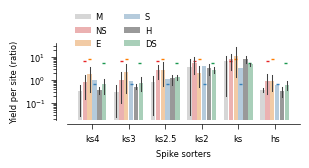

In [66]:
# plot
import seaborn as sns

fig, ax = plt.subplots(figsize=(3, 1))
ax = sns.barplot(
    df,
    x="sorters",
    y="yield per site",
    hue="experiments",
    errorbar=("ci", 95),
    hue_order=["M", "NS", "E", "S", "H", "DS"],
    palette=[
        cl["COLOR_NV"],
        cl["COLOR_NS"],
        cl["COLOR_NE"],
        cl["COLOR_NB"],
        cl["COLOR_HV"],
        cl["COLOR_HS"],
    ],
    alpha=0.4,
    gap=0.1,
)

# theoretical yield
shift = 0
for s_i in range(len(sorters)):
    plt.scatter(
        np.array([-0.2, -0.07, 0.07, 0.3]) + shift,
        [gt_yld_ns, gt_yld_ne, gt_yld_s, gt_yld_ds],
        marker="_",
        s=5,
        linewidth=1,
        color=[cl["COLOR_NS"], cl["COLOR_NE"], cl["COLOR_NB"], cl["COLOR_HS"]],
    )
    shift += 1


ax.set_yscale("log")

# show logarithmic ticks
locmaj = matplotlib.ticker.LogLocator(base=10, numticks=N_MJ_TCKS)
locmin = matplotlib.ticker.LogLocator(
    base=10.0, subs=np.arange(0, 10, 1), numticks=N_MN_TCKS
)
ax.tick_params(which="both")
ax.yaxis.set_major_locator(locmaj)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# disconnect axes (R style)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.spines["right"].set_visible(False)

# legend
# - show only experiments not theoretical
# yield lgd
ax.set_ylabel("Yield per site (ratio)")
ax.set_xlabel("Spike sorters")
exps = ["M", "NS", "E", "S", "H", "DS"]
h, l = ax.get_legend_handles_labels()
ax.legend(
    handles=[hi for hi in h[: len(exps)]],
    labels=[li for li in exps],
    loc="upper left",
    bbox_to_anchor=(0, 1.5),
    ncol=2,
    **legend_cfg,
)

# save
savefig(
    "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/figures/1_sorting_failures/yield/assets/fig5A_yield.svg"
)

### Comparison reported in vivo yields

Text(0.5, 0, 'Spike sorter')

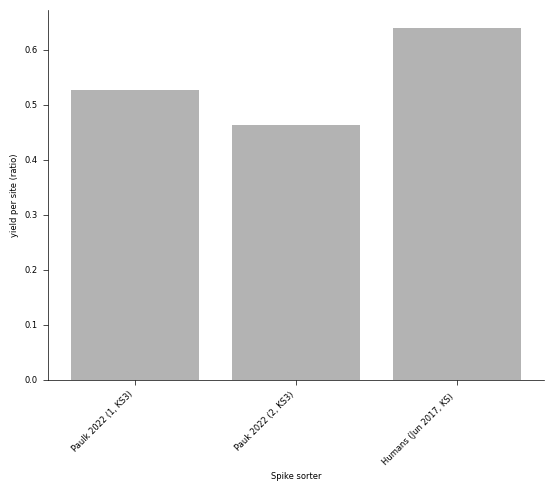

In [12]:
# JUN 2017 NATURE DATASET

# - Jun et al., “Fully Integrated Silicon Probes for High-Density Recording of Neural Activity.”
# - 960 electrodes and 384 selectable channels
unit_yield_per_site_jun_2017 = 0.64
unit_yield_per_site_jun_2017_se = 0.32

# PAULK DATASET

# - they had 960 electrodes but selected 384 user-selectable channels
# - they report number single units per patient (we omit patient 3 who
# had a temporal lobectomy)
unit_yield_per_site_paulk_2022_patient_1 = 202 / 384
unit_yield_per_site_paulk_2022_patient_2 = 178 / 384

# ALLEN MICE ?

# plot
unit_yields_per_site = [
    unit_yield_per_site_paulk_2022_patient_1,
    unit_yield_per_site_paulk_2022_patient_2,
    unit_yield_per_site_jun_2017,
]

# yield standard error
yields_err = np.zeros(len(unit_yields_per_site))
x = [0, 1, 2]

# plot
fig, ax = plt.subplots(1, 1)
ax.errorbar(
    x,
    unit_yields_per_site,
    yerr=yields_err,
    linestyle="None",
    color=(0.7, 0.7, 0.7),
)
ax.bar(x, unit_yields_per_site, color=(0.7, 0.7, 0.7), zorder=1000)
ax.set_xticks(x)
ax.set_xticklabels(
    [
        "Paulk 2022 (1, KS3)",
        "Pauk 2022 (2, KS3)",
        "Humans (Jun 2017, KS) ",
    ],
    rotation=45,
    ha="right",
)
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylabel("yield per site (ratio)")
ax.set_xlabel("Spike sorter")